In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utils import get_seasonality_trend_overview
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [5]:
df_oil = pd.read_csv("../originalni_datasetovi/oil.csv")

In [6]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [7]:
df_oil.rename(columns={"dcoilwtico": "oil_price"}, inplace=True) # change column name for readability
df_oil["date"] = pd.to_datetime(df_oil.date)
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1218 non-null   datetime64[ns]
 1   oil_price  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [8]:
df_oil.loc[df_oil['date'] == '2013-01-01', 'oil_price'] = 93.14 # since linear interpolation doesnt work on data thats not between data points we use 2nd data point as 1st data point
df_oil = df_oil.interpolate(method='linear', limit=20)
df_oil.describe()

,date,oil_price
count,1218,1218.000000
mean,2015-05-02 12:00:00,67.682742
min,2013-01-01 00:00:00,26.190000
25%,2014-03-03 06:00:00,46.422500
50%,2015-05-02 12:00:00,53.185000
75%,2016-06-30 18:00:00,95.685000
max,2017-08-31 00:00:00,110.620000
std,NaN,25.632933


Text(0.5, 1.0, 'Distribution : Oil Price')

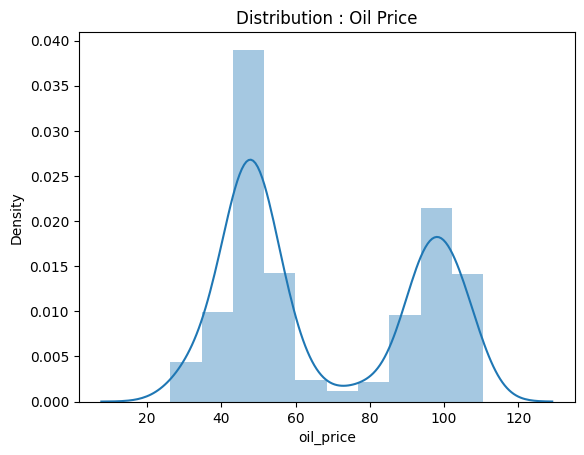

In [9]:
sns.distplot(df_oil['oil_price']);
plt.title('Distribution : Oil Price')

Text(0, 0.5, 'Oil Price')

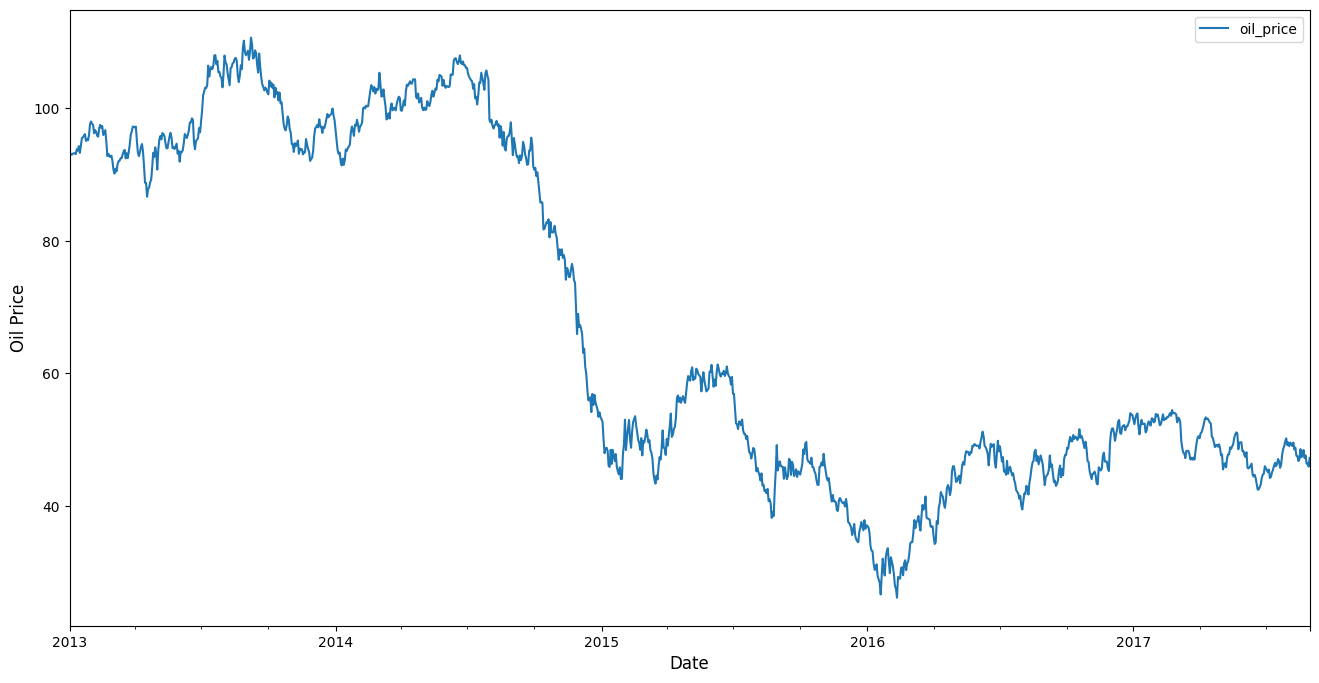

In [10]:
ax = df_oil.set_index('date').plot(figsize = (16, 8))
ax.set_xlabel('Date', fontsize = 'large')
ax.set_ylabel("Oil Price", fontsize = 'large')

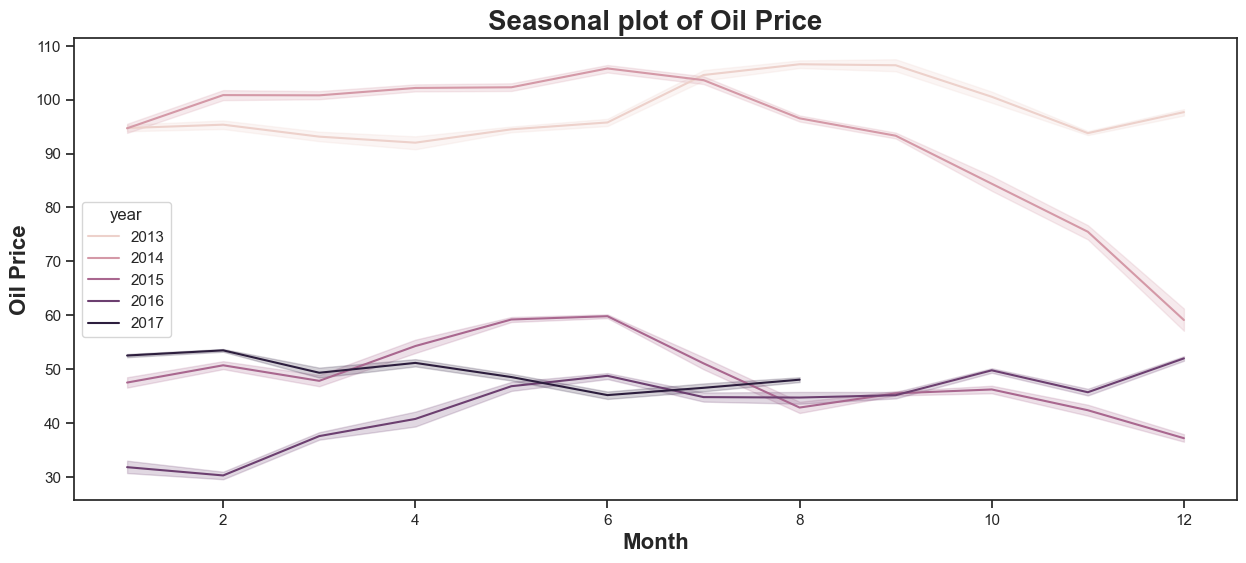

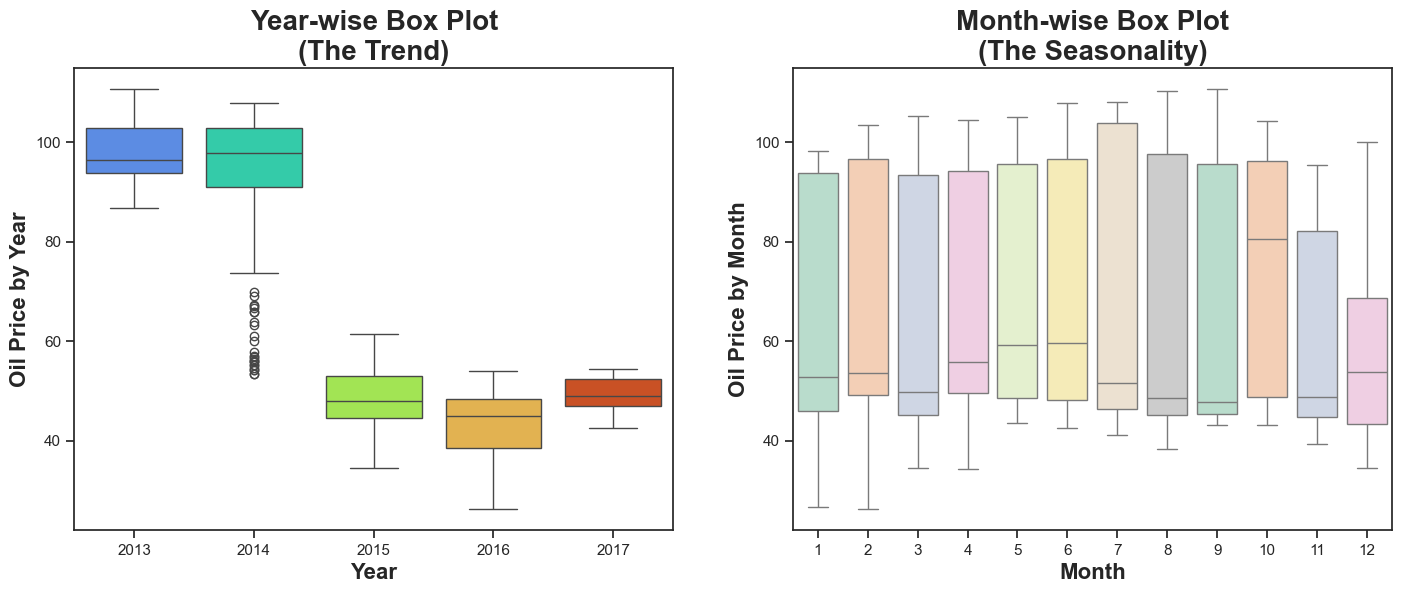

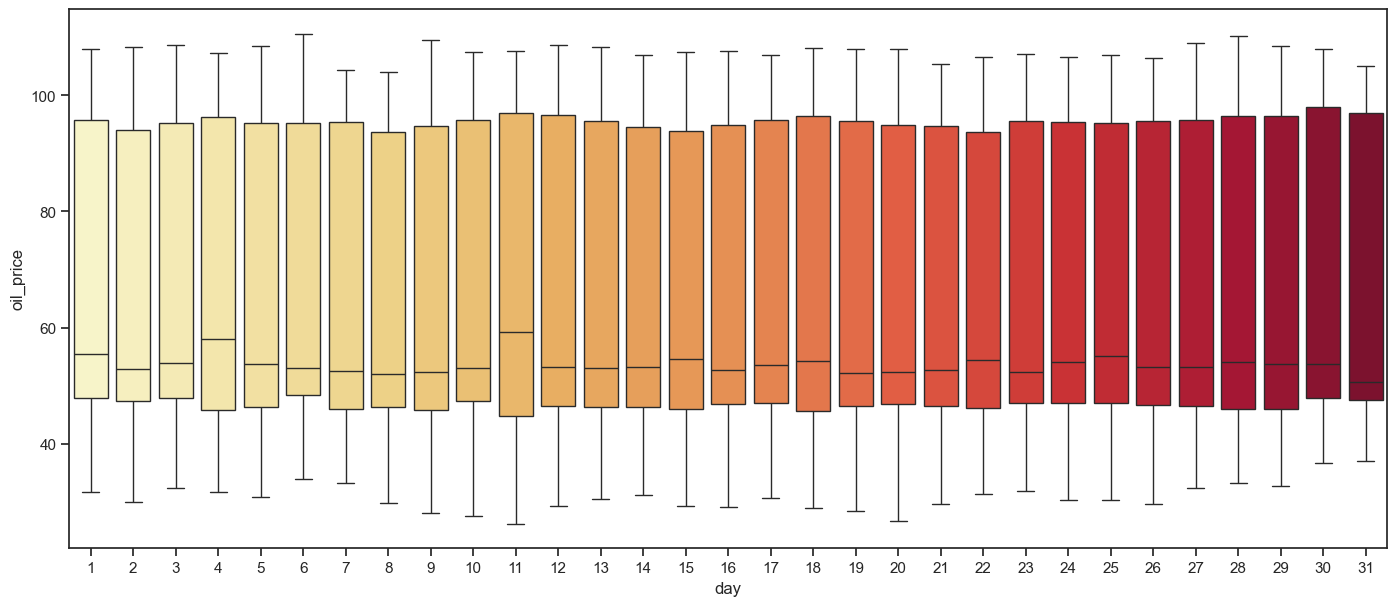

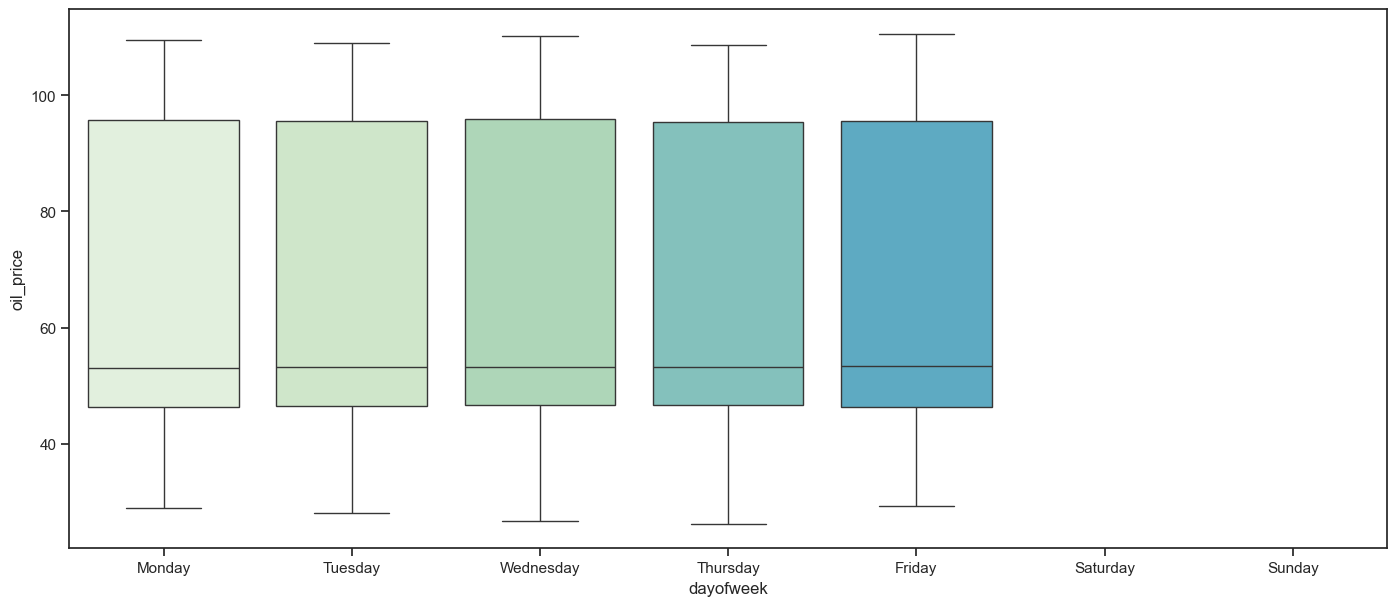

In [12]:
get_seasonality_trend_overview(df_oil, 'oil_price', title_name="Oil Price")